## 将数据集改写为csv格式

In [2]:
import os
import pandas as pd
import pypyodbc

In [1]:
conn = pypyodbc.connect(
    r"Driver={Microsoft Access Driver (*.mdb, *.accdb)};"
    r"Dbq=../Dataset/Database11.accdb")

In [15]:
data = pd.read_sql('SELECT * FROM dbo_ExportData2019', conn).pivot(columns='rtuid', index='colldatetime', values='collnum')
# data2018 = pd.read_sql('SELECT * FROM dbo_ExportData2018', conn).pivot(columns='rtuid', index='colldatetime', values='collnum')
# data2019 = pd.read_sql('SELECT * FROM dbo_ExportData2018', conn).pivot(columns='rtuid', index='colldatetime', values='collnum')

In [17]:
# data.to_csv('../data_p_2019.csv')

In [21]:
root1 = '../Dataset'
df_list = list()
for i in [2017, 2018, 2019]:
    df = pd.read_csv(os.path.join(root1, 'data_p_' + str(i) + '.csv'))
    df_list += [df]
df_all = pd.concat(df_list)

In [28]:
df_all.to_csv(os.path.join(root1, 'data_p_171819.csv'))

## 读取数据集

In [2]:
import os
import pandas as pd
from matplotlib import pyplot as plt
import sys
import time
sys.path.append('..')
from src.support_function import str_to_datetime

In [3]:
root1 = '../Dataset'
df = pd.read_csv(os.path.join(root1, 'data_p_171819.csv'), index_col=0)

In [5]:
print(df.shape)
df.head(3)

(853593, 134)


,0001,0002,0003,0004,0006,0008,0009,000a,000d,000f,...,0101300121,0101300176,0101500245,0101500249,0101500257,0101500316,0101500338,0701500098,1800000021,colldatetime
0,0.266,0.293,0.204,0.288,NaN,0.278,NaN,0.061,NaN,0.286,...,0.275,NaN,0.2713,NaN,0.145,0.278,0.2812,NaN,NaN,2017-01-01 00:00:00
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-01-01 00:00:31
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-01-01 00:00:35


In [4]:
df = df.dropna(axis=1, thresh=int(df.shape[0]*0.01))

In [5]:
df1 = df.dropna(axis=1, thresh=int(df.shape[0]*0.05))
df1['datetime'] = df1['colldatetime'].apply(str_to_datetime)

G:\Anaconda\envs\pytorch_env\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [6]:
df1

,0001,000d,0019,0020,002a,002b,002c,002d,0031,0034,...,0101300121,0101300176,0101500245,0101500249,0101500316,0101500338,0701500098,1800000021,colldatetime,datetime
0,0.266,NaN,0.273,0.262,0.292,0.269,0.304,0.29,0.299,NaN,...,0.275,NaN,0.2713,NaN,0.2780,0.2812,NaN,NaN,2017-01-01 00:00:00,2017-01-01 00:00:00
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-01-01 00:00:31,2017-01-01 00:00:31
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-01-01 00:00:35,2017-01-01 00:00:35
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-01-01 00:00:37,2017-01-01 00:00:37
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-01-01 00:00:38,2017-01-01 00:00:38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145080,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.271,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-09-24 16:00:34,2019-09-24 16:00:34
145081,NaN,NaN,NaN,NaN,0.297,NaN,NaN,NaN,NaN,NaN,...,0.271,NaN,NaN,0.2800,0.2491,0.2996,0.2735,0.2775,2019-09-24 16:15:00,2019-09-24 16:15:00
145082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.271,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-09-24 16:15:32,2019-09-24 16:15:32
145083,NaN,NaN,NaN,NaN,0.294,NaN,NaN,NaN,NaN,NaN,...,0.271,NaN,NaN,0.2924,0.2460,0.2967,0.2708,0.2794,2019-09-24 16:30:00,2019-09-24 16:30:00


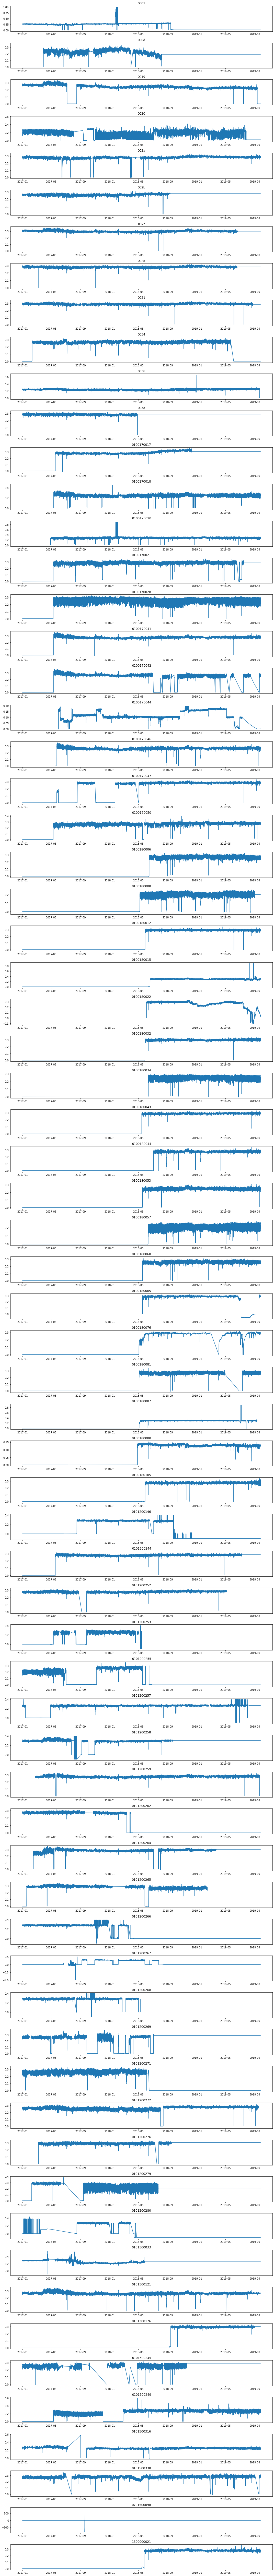

In [56]:
plt.figure(facecolor='w', figsize=(15, 2 * df1.shape[1]))
for index, i in enumerate(list(df1.columns)[0:-2]):
    plt.subplot(df1.shape[1],1, index+1)
    plt.plot(df1['datetime'], df1[i].interpolate().fillna(0))
    plt.title(i)
plt.tight_layout()
plt.show()

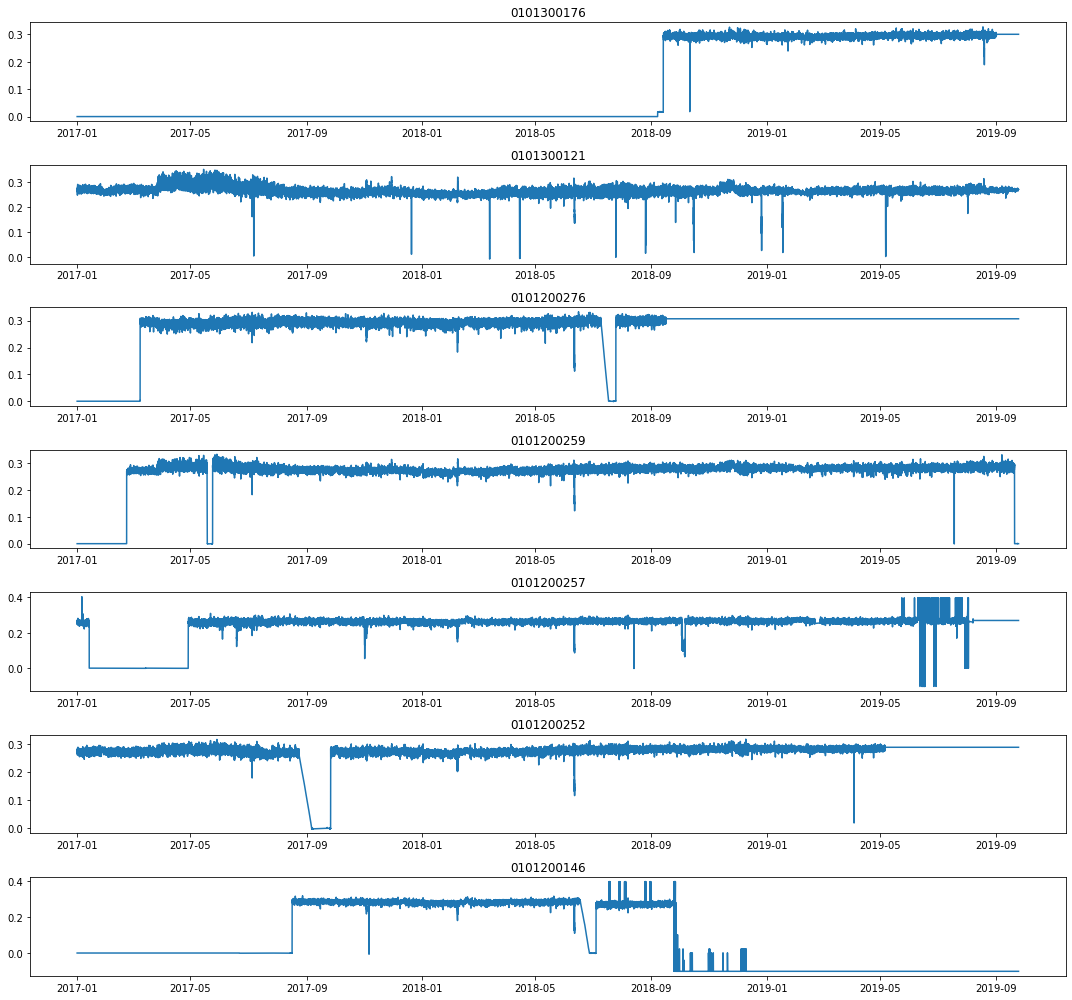

In [47]:
columns = ['0101300176', '0101300121', '0101200276', '0101200259', '0101200257','0101200252', '0101200146']
plt.figure(facecolor='w', figsize=(15, 2 * len(columns)))
for index, i in enumerate(columns):
    plt.subplot(len(columns),1, index+1)
    plt.plot(df1['datetime'], df1[i].interpolate(limite_direction='both').fillna(0))
    plt.title(i)
plt.tight_layout()
plt.show()

In [7]:
df_final = df1[['0101300121', '0101200259', '0101200257','0101200252', 'datetime']]

In [8]:
df_final = df_final.set_index('datetime')

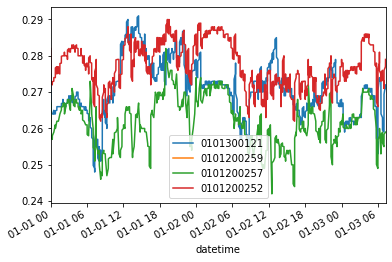

In [10]:
df_final.head(2000).interpolate().plot()

In [11]:
df = df_final.interpolate().fillna(0)

In [12]:
df.to_csv(os.path.join(root1, '4p_dataset.csv'))